In [22]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

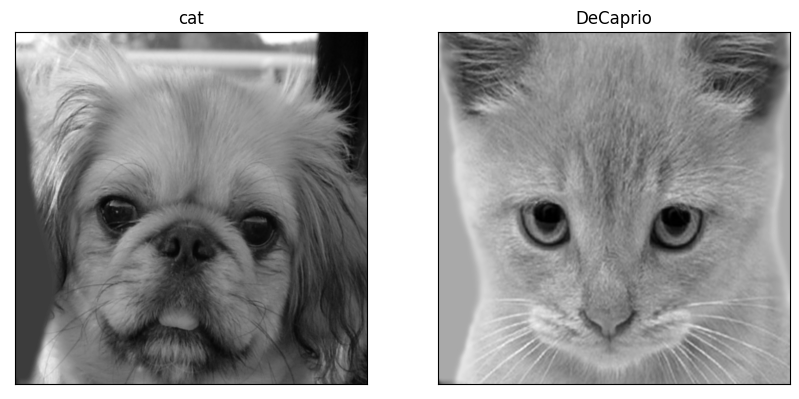

In [23]:
img1 = cv.imread('data/dog.bmp')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img1 = cv.resize(img1, (2048, 2048))

img2 = cv.imread('data/cat1.bmp')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
img2 = cv.resize(img2, (2048, 2048))


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('cat')
plt.imshow(img1, cmap='gray')
plt.xticks([])
plt.yticks([]);
plt.subplot(122)
plt.title('DeCaprio')
plt.imshow(img2, cmap='gray')
plt.xticks([])
plt.yticks([]);

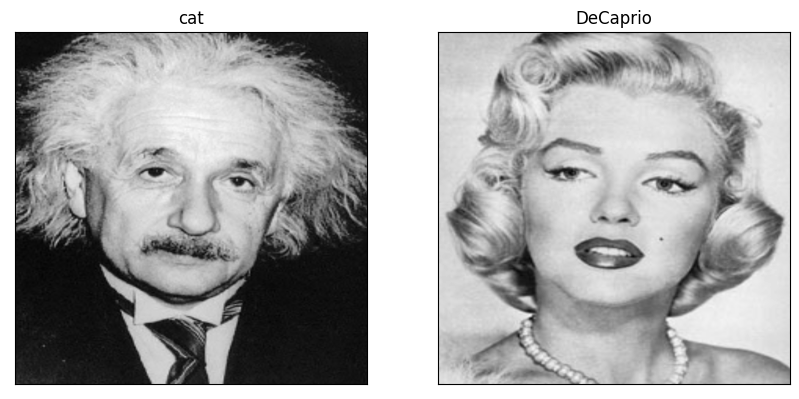

In [24]:
img3 = cv.imread('data/einstein.bmp')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
img3 = cv.resize(img3, (2048, 2048))

img4 = cv.imread('data/marilyn.bmp')
img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
img4 = cv.resize(img4, (2048, 2048))


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('cat')
plt.imshow(img3, cmap='gray')
plt.xticks([])
plt.yticks([]);
plt.subplot(122)
plt.title('DeCaprio')
plt.imshow(img4, cmap='gray')
plt.xticks([])
plt.yticks([]);

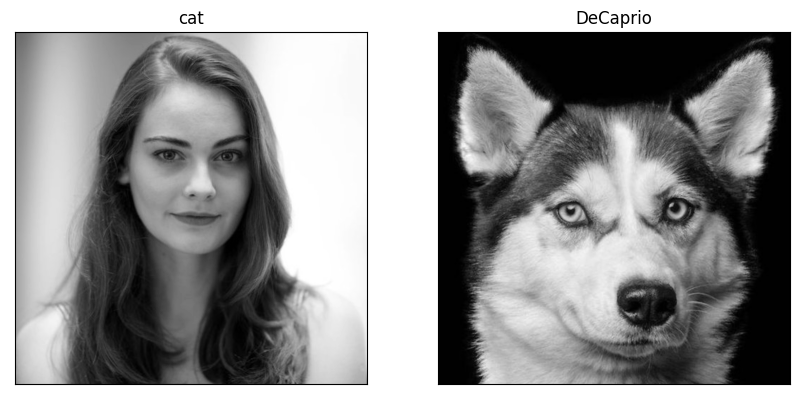

In [25]:
img5 = cv.imread('data/h31.jpg')
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
img5 = cv.resize(img5, (2048, 2048))

img6 = cv.imread('data/h32.jpg')
img6 = cv.cvtColor(img6, cv.COLOR_BGR2GRAY)
img6 = cv.resize(img6, (2048, 2048))


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('cat')
plt.imshow(img5, cmap='gray')
plt.xticks([])
plt.yticks([]);
plt.subplot(122)
plt.title('DeCaprio')
plt.imshow(img6, cmap='gray')
plt.xticks([])
plt.yticks([]);

In [26]:
def gen_gaussian_pyramid(I, levels=10):
    G = I.copy()
    gpI = [G]
    for i in range(levels):
        G = cv.pyrDown(G)
        gpI.append(G)
    return gpI

In [27]:
# gpA = gen_gaussian_pyramid(img1)
# gpB = gen_gaussian_pyramid(img2)

In [28]:
gpA = gen_gaussian_pyramid(img3)
gpB = gen_gaussian_pyramid(img4)

In [29]:
# gpA = gen_gaussian_pyramid(img5)
# gpB = gen_gaussian_pyramid(img6)

In [30]:
def gen_laplacian_pyramid(gpI):
    num_levels = len(gpI)-1
    lpI = [gpI[num_levels]]
    for i in range(num_levels,0,-1):
        GE = cv.pyrUp(gpI[i])
        L = cv.subtract(gpI[i-1],GE)
        lpI.append(L)
    return lpI

In [31]:
lpA = gen_laplacian_pyramid(gpA)
lpB = gen_laplacian_pyramid(gpB)

In [32]:
LS = []
for i in range(11):
    if i < 6:
        LS.append(lpA[i])
    else:
        LS.append(lpB[i])

In [33]:
ls_ = LS[0]
for i in range(1,11):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])


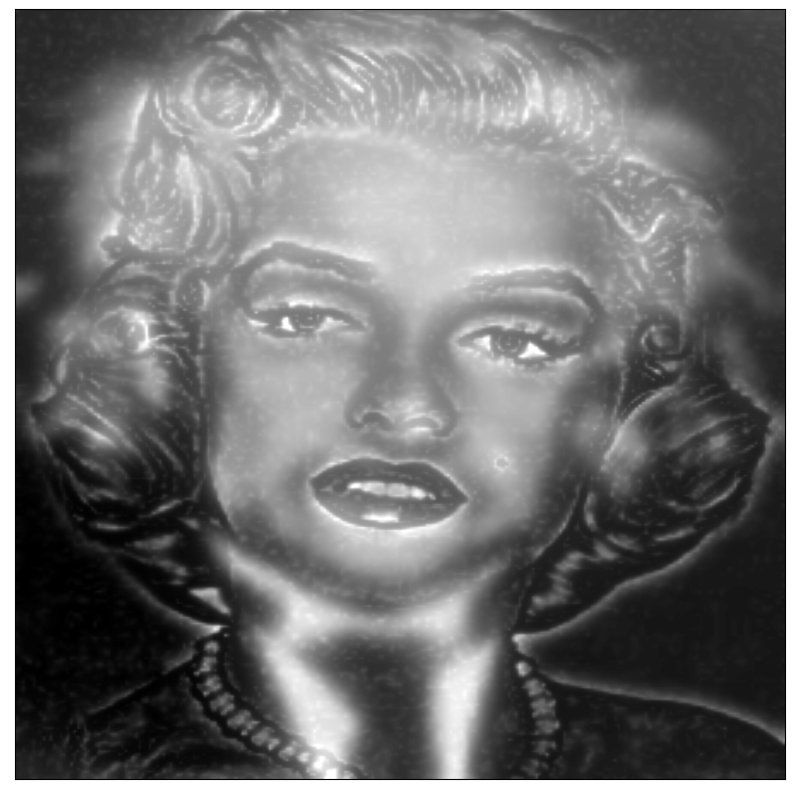

In [34]:
plt.figure(figsize=(10, 10))
plt.imshow(ls_, cmap='gray')
plt.xticks([])
plt.yticks([]);

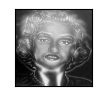

In [35]:
plt.figure(figsize=(1, 1))
plt.imshow(ls_, cmap='gray')
plt.xticks([])
plt.yticks([]);